<a href="https://colab.research.google.com/github/MohamedTolba1199/Apply-Perceptron-from-scratch-as-a-special-case-from-NN/blob/main/Perceptron_NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


# Read_data and convert it to dataframe


In [ ]:
data=load_breast_cancer()

In [ ]:
#variable names in the dataset.
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df=pd.DataFrame(data=data['data'],columns=data.feature_names)
df['target']=data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Check for Dtypes/Num_Unique/Null_values/Null_Ratio

In [ ]:
pd.DataFrame({"Dtype": df.dtypes, "Num_Unique": df.nunique(), "Null_values": df.isnull().sum(),
              "Null_Ratio": df.isnull().sum() / df.shape[0]}).T

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
Dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
Num_Unique,456,479,522,539,474,537,537,542,432,499,...,511,514,544,411,529,539,492,500,535,2
Null_values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# split data(x,y)

In [ ]:
X = df.drop(["target"],axis=1)
y=df["target"]

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

# check_balance

In [ ]:
df["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

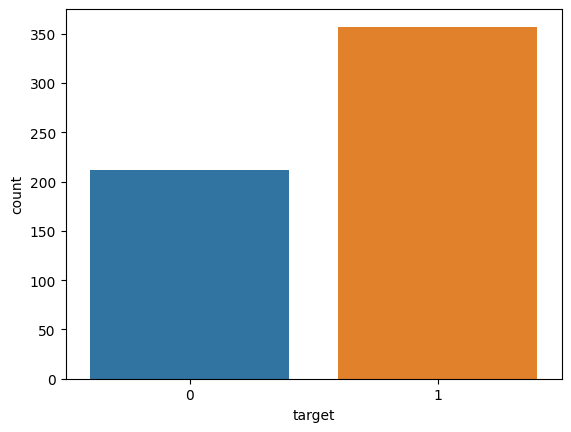

In [ ]:
sns.countplot(x="target",data =df)

# Handling Balance Data

In [ ]:
smote=SMOTE(sampling_strategy='minority',k_neighbors=5)
X_resampled,y_resampled=smote.fit_resample(X,y)

In [ ]:
Counter(y_resampled)

Counter({0: 357, 1: 357})

# Split Data(train , test)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=.2,random_state=42)

# Normlization

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#Build perceptron from scratch

## Activation Function

In [ ]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

## Prepare Perceptron

In [ ]:
def perceptron(X,weights,bais):
    linear_prediction=np.dot(X,weights)+bais

    y_pred=sigmoid(linear_prediction)

    y_p=[1 if y>=0.5 else 0  for y in y_pred ]

    return y_p

## Update Weight

In [ ]:
def update_weights(weights,X,y_pred,y_actual,lr):
    m=len(y)

    derivative_cost_function=(1/m)*np.dot(X.T,(y_pred-y_actual))

    weights=weights-lr*derivative_cost_function

    return weights

##Update Weight(baise)

In [ ]:
def update_bais(bais,X,z,y,lr):
    m=len(y)

    db=(1/m)*np.sum(z-y)
    bais=bais-lr*db
    return bais

## Prepare Evaluation

In [ ]:
def accuarcy(y_pred,y_actual):
    return np.sum(y_pred==y_actual)/len(y_actual)

# Train

In [ ]:
X_train.shape

(571, 30)

In [ ]:
lr=0.001
weights=np.zeros(X_train.shape[1]) #30 zero for 30 weight(initial weight )
bais=0



for i in range(1000):

    pred=perceptron(X_train,weights,bais)

    #print("Accuracy : ",accuarcy(pred,train_y))


    weights=update_weights(weights,X_train,pred,y_train,lr)
    bais=update_bais(bais,X_train,pred,y_train,lr)

In [ ]:
weights

array([ 1.22037638e-04, -8.72704282e-06,  1.34981091e-04, -4.95771441e-05,
       -3.57490222e-05,  2.78218018e-04, -2.34909300e-04, -1.39346662e-04,
        4.19127434e-05, -6.96388581e-05, -1.96984606e-04,  2.90362427e-05,
        1.86713173e-04, -1.86986221e-04, -7.68206862e-06, -1.00306454e-04,
        1.97544543e-04, -2.03078506e-04,  5.69626827e-05,  1.42849314e-04,
       -1.64658696e-04, -1.14198263e-04, -7.90045802e-05, -2.17802797e-04,
       -1.16792493e-05, -6.21455503e-05, -6.92702708e-05, -1.80000957e-05,
       -1.11306272e-04, -6.29444152e-05])

In [ ]:
bais

-0.00021891418563922967

# Evaluation

In [ ]:
y_train_pred=perceptron(X_train,weights,bais)
print("Accuarcy : " ,accuarcy(y_train_pred,y_train))

Accuarcy :  0.9842381786339754


In [ ]:
y_pred=perceptron(X_test,weights,bais)
print("Accuarcy : " ,accuarcy(y_pred,y_test))

Accuarcy :  0.958041958041958
